## Setup

In [37]:
import pandas as pd
import numpy as np
from getpass import getpass

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os
import matplotlib.pyplot as plt


In [38]:
# Load Password
pwd = getpass()


········


In [39]:
pd.set_option('display.max_rows', 100)

In [84]:
scores_2013_2023 = 'SELECT * FROM world_happiness_data;'
happiness_scores= pd.read_csv(r"E:\24Spring\STAT6289 Data Mgmt using Python\Final Project\Data\World Happiness Index 2013-2023.csv")

sql_2020 = 'SELECT * FROM full_report_2020'
full_report_2020 = pd.read_csv(r"E:\24Spring\STAT6289 Data Mgmt using Python\Final Project\Data\World Happiness Report 2020.csv")

sql_2021 = 'SELECT * FROM full_report_2021'
full_report_2021 = pd.read_csv(r"E:\24Spring\STAT6289 Data Mgmt using Python\Final Project\Data\World Happiness Report 2021.csv")

sql_2022 = 'SELECT * FROM full_report_2022'
full_report_2022 = pd.read_csv(r"E:\24Spring\STAT6289 Data Mgmt using Python\Final Project\Data\World Happiness Report 2022.csv")

sql_2023 = 'SELECT * FROM full_report_2023'
full_report_2023 = pd.read_csv(r"E:\24Spring\STAT6289 Data Mgmt using Python\Final Project\Data\World Happiness Report 2023.csv")

p_2023 = 'SELECT * FROM full_report_p_2023'
full_report_p_2023 = pd.read_csv(r"E:\24Spring\STAT6289 Data Mgmt using Python\Final Project\Data\World Polluted Country Report 2023.csv")


In [85]:
# Add year column to individual reports
full_report_2020.loc[:, 'Year'] = 2020
full_report_2021.loc[:, 'Year'] = 2021
full_report_2022.loc[:, 'Year'] = 2022
full_report_2023.loc[:, 'Year'] = 2023
full_report_p_2023.loc[:, 'Year'] = 2023


# Convert Country Name columns to title case 
full_report_2020.loc[:, 'Country'] = full_report_2020.loc[:, 'Country name'].str.title()
full_report_2021.loc[:, 'Country'] = full_report_2021.loc[:, 'Country name'].str.title()
full_report_2022.loc[:, 'Country'] = full_report_2022.loc[:, 'Country name'].str.title()
full_report_2023.loc[:, 'Country'] = full_report_2023.loc[:, 'Country name'].str.title()
full_report_p_2023.loc[:, 'Country'] = full_report_p_2023.loc[:, 'Country name'].str.title()


happiness_scores.loc[:, 'Country'] = happiness_scores.loc[:, 'Country name'].str.title()

In [86]:
# Union all the reports year / country
comb_reports = pd.concat([full_report_2020[['Country', 'Year']], full_report_2021[['Country', 'Year']], 
                          full_report_2022[['Country', 'Year']], full_report_2023[['Country', 'Year']]], axis = 0)

comb_reports.shape

(585, 2)

### Coverage of full report data

In [87]:
# Observere how many countries have coverage for each year - vast majority have all 4 years
comb_reports.groupby('Country').agg({'Year': 'count'}) \
    .reset_index() \
    .groupby('Year').agg({'Country': 'count'})

,Country
Year,
1,28
2,17
3,13
4,121


### Get common attributes, and join them with df_happiness

In [88]:
com_attrs = ['Country', 'Economy', 'Social support', 'Health', 'Freedom', 'Trust', 'Generosity', 'Year']

In [89]:
country_pollution_2023 = pd.concat([full_report_p_2023[['Country', 'pollution_Rank', 'pollution_growth_Rate']]],axis = 0)
country_pollution_2023 = country_pollution_2023.drop_duplicates().copy()
country_pollution_2023

,Country,pollution_Rank,pollution_growth_Rate
0,India,1,0.00808
1,China,2,-0.00015
2,United States,3,0.00505
3,Indonesia,4,0.00738
4,Pakistan,5,0.01976
5,Nigeria,6,0.02408
6,Brazil,7,0.00515
7,Bangladesh,8,0.01033
8,Russia,9,-0.00186
9,Mexico,10,0.00746


### Add country_pollution_2023 to happiness scores / data

In [95]:
df_happiness = pd.merge(happiness_scores,country_pollution_2023, how = 'inner', on = 'Country').copy()
print(df_happiness.shape)
df_happiness.head()

(910, 7)


,Country name,Year,HappinessIndex,Rank,Country,pollution_Rank,pollution_growth_Rate
0,Afghanistan,2013,4.040,143.0,Afghanistan,36,0.02702
1,Afghanistan,2015,3.575,153.0,Afghanistan,36,0.02702
2,Afghanistan,2016,3.360,154.0,Afghanistan,36,0.02702
3,Afghanistan,2017,3.794,141.0,Afghanistan,36,0.02702
4,Afghanistan,2018,3.632,145.0,Afghanistan,36,0.02702


In [91]:
# Combine all data with full score breakdown
all_score_breakdown = \
    pd.concat([full_report_2020[com_attrs], full_report_2021[com_attrs], full_report_2022[com_attrs],
           full_report_2023[com_attrs]], axis = 0).copy()

all_score_breakdown.shape

(585, 8)

In [92]:
df_comb = pd.merge(df_happiness, all_score_breakdown, how = 'inner', on = ['Country', 'Year']).copy()
print(df_comb.shape)
df_comb.head()

(542, 13)


,Country name,Year,HappinessIndex,Rank,Country,pollution_Rank,pollution_growth_Rate,Economy,Social support,Health,Freedom,Trust,Generosity
0,Singapore,2020,6.377,31.0,Singapore,114.0,0.00653,1.519580,1.395457,1.137814,0.635317,0.533162,0.218771
1,Zambia,2020,3.759,141.0,Zambia,NaN,NaN,0.536834,0.896037,0.363593,0.491318,0.086705,0.250621
2,Italy,2020,6.387,30.0,Italy,25.0,-0.00282,1.236396,1.347296,1.022505,0.321306,0.040146,0.170266
3,Estonia,2020,6.022,51.0,Estonia,156.0,-0.00249,1.192441,1.453233,0.842615,0.576665,0.201767,0.125137
4,Colombia,2020,6.163,44.0,Colombia,28.0,0.00407,0.932204,1.334451,0.810020,0.526890,0.045848,0.092374


EDA

In [93]:
# Create mask to just look at 2020/ 2023 data
msk_2020_2023 = df_comb['Year'].isin([2020, 2021, 2022, 2023])
df_comb[msk_2020_2023].shape

(542, 13)

In [94]:
analysis_features = ['HappinessIndex', 'pollution_growth_Rate','Economy', 'Health', 'Freedom', 'Trust', 'Generosity']

corr = df_comb.loc[msk_2020_2023, analysis_features].corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

,HappinessIndex,pollution_growth_Rate,Economy,Health,Freedom,Trust,Generosity
HappinessIndex,1.000000,-0.127002,0.687006,0.641059,0.618132,0.462002,0.030953
pollution_growth_Rate,-0.127002,1.000000,-0.214007,-0.237328,-0.024106,0.016716,0.094721
Economy,0.687006,-0.214007,1.000000,0.431548,0.471102,0.350889,-0.232714
Health,0.641059,-0.237328,0.431548,1.000000,0.290523,0.286437,-0.037818
Freedom,0.618132,-0.024106,0.471102,0.290523,1.000000,0.424736,0.146598
Trust,0.462002,0.016716,0.350889,0.286437,0.424736,1.000000,0.160207
Generosity,0.030953,0.094721,-0.232714,-0.037818,0.146598,0.160207,1.000000


### Run regresson of factors against HappinessIndex score

In [96]:
reg_df = df_comb.loc[msk_2020_2023, analysis_features + ['Country', 'Year']].copy()
print(reg_df.shape)
reg_df.head()

(542, 9)


,HappinessIndex,pollution_growth_Rate,Economy,Health,Freedom,Trust,Generosity,Country,Year
0,6.377,0.00653,1.519580,1.137814,0.635317,0.533162,0.218771,Singapore,2020
1,3.759,NaN,0.536834,0.363593,0.491318,0.086705,0.250621,Zambia,2020
2,6.387,-0.00282,1.236396,1.022505,0.321306,0.040146,0.170266,Italy,2020
3,6.022,-0.00249,1.192441,0.842615,0.576665,0.201767,0.125137,Estonia,2020
4,6.163,0.00407,0.932204,0.810020,0.526890,0.045848,0.092374,Colombia,2020


In [97]:
# Drop these observations out for the model
print(reg_df.isna().sum())
reg_df = reg_df.dropna().copy()
print(reg_df.isna().sum())


HappinessIndex             0
pollution_growth_Rate    203
Economy                    0
Health                     0
Freedom                    0
Trust                      0
Generosity                 0
Country                    0
Year                       0
dtype: int64
HappinessIndex           0
pollution_growth_Rate    0
Economy                  0
Health                   0
Freedom                  0
Trust                    0
Generosity               0
Country                  0
Year                     0
dtype: int64


In [98]:
# Apply standard scaler to scale dependent variables
feats_to_scale = ['pollution_growth_Rate', 'Economy', 'Health', 'Freedom', 'Trust', 'Generosity']
X_scale = reg_df.filter(feats_to_scale).copy()
print(X_scale.head())
scaler = StandardScaler()
scaler.fit(X_scale)
X = scaler.transform(X_scale)
y = np.array(reg_df['HappinessIndex'].copy())
X.shape, y.shape

   pollution_growth_Rate   Economy    Health   Freedom     Trust  Generosity
0                0.00653  1.519580  1.137814  0.635317  0.533162    0.218771
2               -0.00282  1.236396  1.022505  0.321306  0.040146    0.170266
3               -0.00249  1.192441  0.842615  0.576665  0.201767    0.125137
4                0.00407  0.932204  0.810020  0.526890  0.045848    0.092374
5               -0.01390  1.046555  0.777777  0.417820  0.000000    0.103834


((339, 6), (339,))

In [99]:
# Add standardized features to regression df
for ii in range(X.shape[1]):
    col_name = feats_to_scale[ii] + '_scale'
    reg_df.loc[:, col_name] = X[:, ii]

In [101]:
# Model coefficients and intercept
model = LinearRegression().fit(X, y)
model.coef_, model.intercept_,

(array([0.06962641, 0.45956451, 0.43794764, 0.25662582, 0.0984902 ,
        0.08060552]),
 5.92395575221239)

In [102]:
# R^2 of the model (high R^2 of 77%)
r2_score(y_pred = model.predict(X), y_true = reg_df['HappinessIndex'])

0.7246900888016171

In [103]:
# Create map between coefficients and feature names
feature_coef_map = dict(zip(feats_to_scale, model.coef_))

In [104]:
feature_coef_map

{'pollution_growth_Rate': 0.06962640543389725,
 'Economy': 0.4595645079498567,
 'Health': 0.4379476383448494,
 'Freedom': 0.2566258224225325,
 'Trust': 0.09849019876297647,
 'Generosity': 0.08060551659664995}

In [105]:
# Add predicted scores and residuals
reg_df.loc[:, 'PredictedIndex'] = model.predict(X)
reg_df.loc[:, 'Resid'] = reg_df['HappinessIndex'] - reg_df['PredictedIndex']

<Axes: >

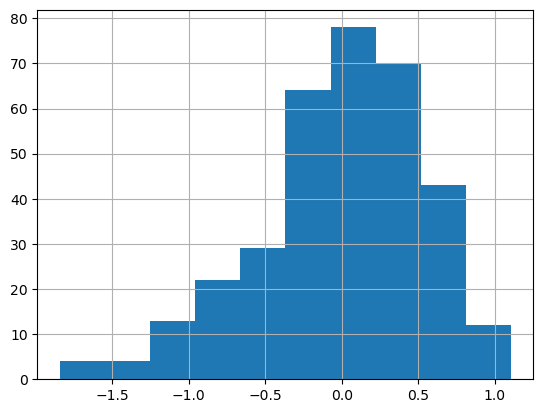

In [106]:
# Plot residuals
reg_df.Resid.hist()

### Add Attribution + Check that it is working

In [107]:
# Calculate effect size of each feature per country / time period
for feat in feats_to_scale:
    coef = feature_coef_map[feat]
    reg_df.loc[:, f'{feat}_contribution'] = reg_df.loc[:, f'{feat}_scale'] * coef

In [108]:
# Check that feature scaling is working
example_feat = 'Generosity'
example_coef = feature_coef_map[example_feat]
example_feat = reg_df.loc[:, example_feat].copy()
example_feat_scale = reg_df.loc[:, f'{feat}_scale'].copy()
example_feat_cont = reg_df.loc[:, f'{feat}_scale'].copy() * coef
feat_comp = pd.concat([example_feat, example_feat_scale, example_feat_cont], axis = 1)
print(feat_comp)

     Generosity  Generosity_scale  Generosity_scale
0      0.218771          0.478055          0.038534
2      0.170266         -0.024057         -0.001939
3      0.125137         -0.491230         -0.039596
4      0.092374         -0.830384         -0.066933
5      0.103834         -0.711756         -0.057371
..          ...               ...               ...
533    0.170000         -0.026813         -0.002161
535    0.080000         -0.958478         -0.077259
536    0.044000         -1.331144         -0.107298
537    0.246000          0.759926          0.061254
539    0.093000         -0.823904         -0.066411

[339 rows x 3 columns]


In [112]:
cont_features = ['Economy_contribution', 'pollution_growth_Rate_contribution', 'Health_contribution', 'Freedom_contribution',
                   'Trust_contribution', 'Generosity_contribution', 'Resid']
cont_features

['Economy_contribution',
 'pollution_growth_Rate_contribution',
 'Health_contribution',
 'Freedom_contribution',
 'Trust_contribution',
 'Generosity_contribution',
 'Resid']

In [113]:
# The intercept of the regression model is just equal to the average happiness score
model.intercept_ == reg_df['HappinessIndex'].mean()

True

In [114]:
# Check that calc scores are the same as actual scores
calc_pred = reg_df[cont_features].sum(axis = 1) +  5.385169811320755
score_comp = pd.concat([calc_pred, reg_df['HappinessIndex']], axis = 1)
score_comp.columns = ['Calculated Score', 'Happiness Index']
assert np.where(abs(score_comp['Calculated Score'] - score_comp['Happiness Index']) >= .00001)
score_comp

,Calculated Score,Happiness Index
0,5.838214,6.377
2,5.848214,6.387
3,5.483214,6.022
4,5.624214,6.163
5,4.563214,5.102
...,...,...
533,6.048214,6.587
535,5.091214,5.630
536,5.150214,5.689
537,5.605214,6.144


In [115]:
# Add intercept to the dataframe for attribution of scores
reg_df.loc[:, 'Intercept'] = model.intercept_

### Write dataframe to CSV

In [116]:
# Get cwd
os.getcwd()

'C:\\Users\\yanhu'

In [117]:
# Write regression data to CSV
reg_df.to_csv('happiness_regression_data.csv')
print('wrote to csv')

wrote to csv
